<a href="https://colab.research.google.com/github/ak-mpbf/Vision-Verse/blob/main/K_means_segmentation_and_Otsu_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow

In [ ]:
images=['/content/1.png','/content/2.png','/content/3.png','/content/4.png','/content/5.png','/content/6.jpg']

**K-MEANS SEGMENTATION :-**

In [ ]:
def k_means(image,k):
  image_n = image.astype(np.float32) / 255.0
  image_f = image_n.reshape((-1, 3))
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 4, 1)
  plt.imshow(image_n[:, :, ::-1])
  plt.title('Original Image')
  for i,k1 in enumerate(k):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centers = cv2.kmeans(image_f, k1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    image_s = centers[labels.flatten()].reshape(image_n.shape)
    plt.subplot(1, 4, i + 2)
    plt.imshow(image_s[:, :, ::-1])
    plt.title(f'K = {k1}')
  plt.show()

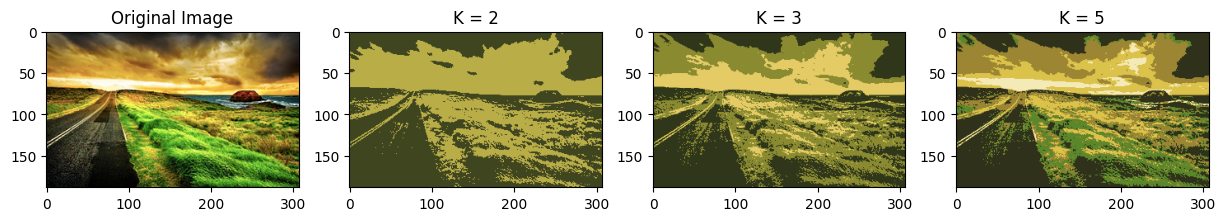

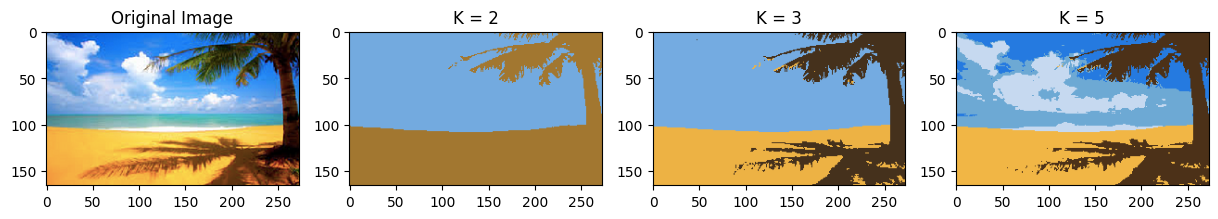

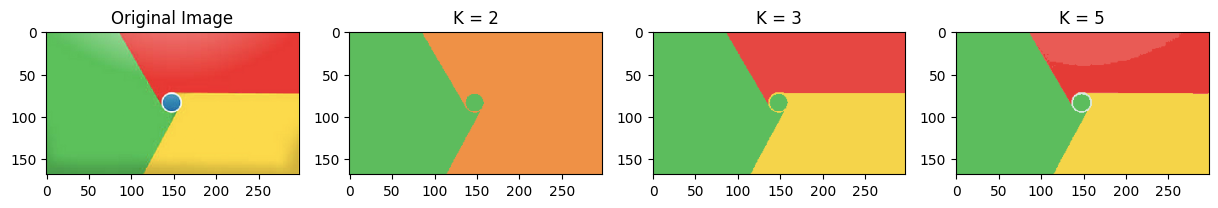

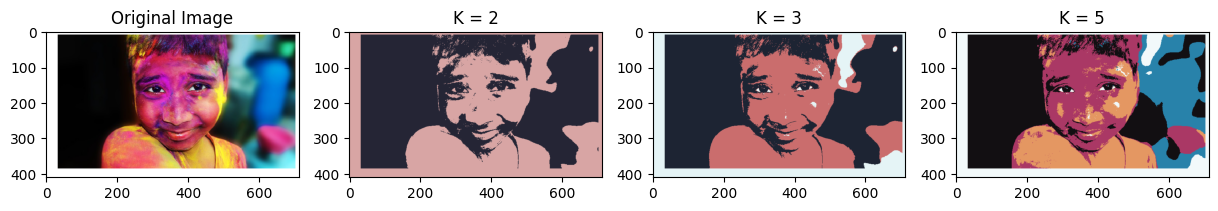

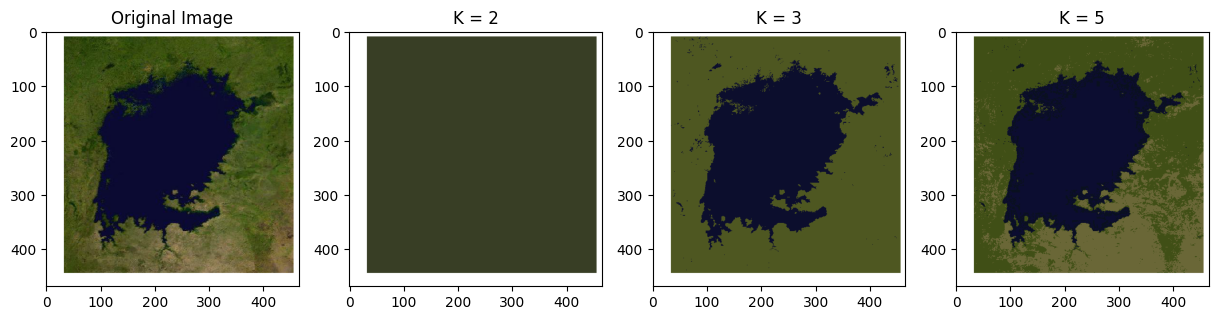

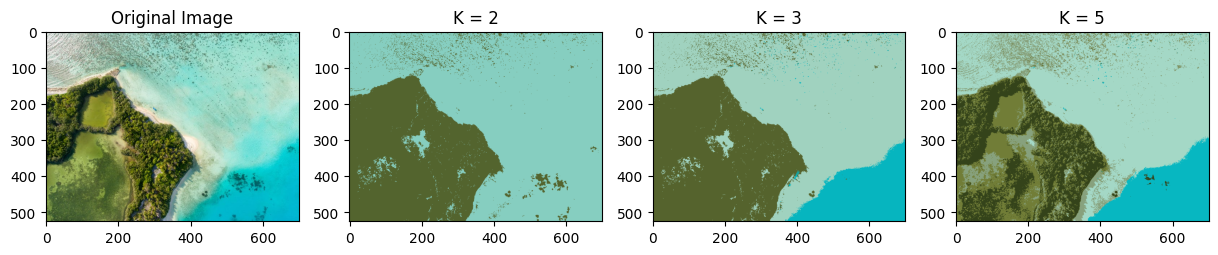

In [ ]:
k=[2,3,5]
for i in range(6):
  image=cv2.imread(images[i]);
  k_means(image,k)

**OTSU THRESHOLDING :-**

In [ ]:
image=cv2.imread('/content/boat.jpg')

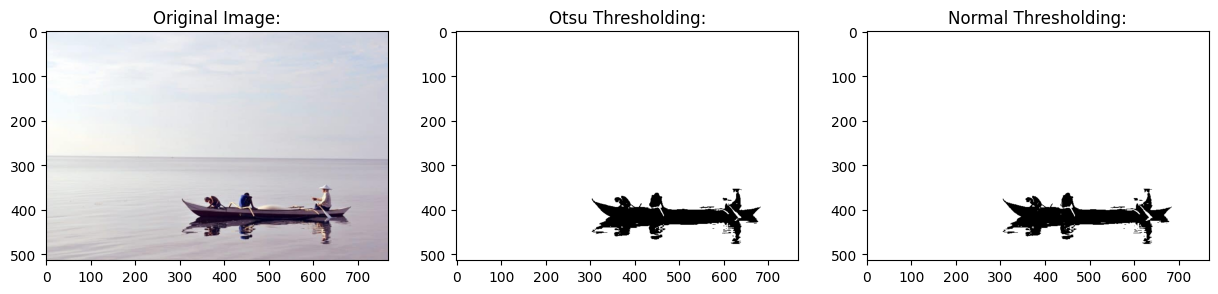

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret1, otsu = cv2.threshold(image_gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret2, normal = cv2.threshold(image_gray, 120, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image:')
plt.subplot(1, 3, 2)
plt.imshow(otsu, cmap='gray')
plt.title('Otsu Thresholding:')
plt.subplot(1, 3, 3)
plt.imshow(normal, cmap='gray')
plt.title('Normal Thresholding:')
plt.show()